In [1]:
# import dependencies
import requests
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress
import datetime

In [2]:
# defining dates for KCMO crime API call
from_dates = ["2019-10-1", "2019-11-1", "2019-12-1", "2020-1-1", "2020-2-1", "2020-3-1", "2020-4-1", "2020-5-1", "2020-6-1", "2020-7-1", "2020-8-1", "2020-9-1", "2020-10-1", "2020-11-1", "2020-12-1"]
to_dates = ["2019-10-31", "2019-11-30", "2019-12-31", "2020-1-31", "2020-2-29", "2020-3-31", "2020-4-30", "2020-5-31", "2020-6-30", "2020-7-31", "2020-8-31", "2020-9-30", "2020-10-31", "2020-11-30", "2020-12-31"]

In [3]:
# lists for loop
from_date = []
to_date = []
incidents = []
parentIncidentType = []

# for loop API call
for i, j in zip(from_dates, to_dates):
    from_date = i + "T00:00:00.000Z"
    from_dates.append([from_date])
    to_date = j + "T23:59:59.999Z"
    to_dates.append([to_date])
    payload = {}
    from_date = from_date
    to_date = to_date
    pageSize = "100000"
    payload["limit"] = pageSize
    payload["offset"] = 0
    payload["geoJson"] = {"type": "Polygon", "coordinates": [[[-94.32951884471989, 38.996363264325836], [-94.64880900585229, 38.996363264325836], [-94.64880900585229, 39.080896419140764], [-94.32951884471989, 39.080896419140764], [-94.32951884471989, 38.996363264325836]]]}
    payload["projection"]= "true"
    payload["propertyMap"] = {"toDate": to_date, "fromDate": from_date, "pageSize": pageSize, "parentIncidentTypeIds": "149,150,148,8,97,104,165,98,100,179,178,180,101,99,103,163,168,166,12,161,14,16,15", "zoomLevel": "12", "latitude": "39.03864248355025", "longitude": "-94.48916392528609", "days": "1,2,3,4,5,6,7", "startHour": "0", "endHour": "24", "timezone": "+00:00", "relativeDate": "custom", "agencyIds": "47860,1279,957,165,118,undefined,undefined"}
    url = "https://ce-portal-service.commandcentral.com/api/v1.0/public/incidents"
    headers = {'Content-Type': 'application/json'}
    payload  = json.dumps(payload)
    response = requests.request("POST", url, data=payload, headers=headers)
    print(i + " to " + j + ":")
    print(len(pd.DataFrame(response.json()['result']['list']['incidents'])))
    incident = len(pd.DataFrame(response.json()['result']['list']['incidents']))
    incidents.append([incident])
        
    try:
        print(pd.DataFrame(pd.DataFrame(response.json()['result']['list']['incidents'])['parentIncidentType'].value_counts()))
        incident_type = pd.DataFrame(pd.DataFrame(response.json()['result']['list']['incidents'])['parentIncidentType'].value_counts())
        parentIncidentType.append([incident_type])
        
    except (KeyError, TypeError):
        pass
        print()
    print("---------------------------------------")

2019-10-1 to 2019-10-31:
98
                     parentIncidentType
Theft                                58
Sexual Offense                       12
Theft from Vehicle                    9
Assault                               5
Breaking & Entering                   4
Quality of Life                       4
Theft of Vehicle                      3
Property Crime                        2
Assault                               1
---------------------------------------
2019-11-1 to 2019-11-30:
114
                     parentIncidentType
Theft                                68
Sexual Offense                       13
Theft from Vehicle                   12
Assault                               6
Breaking & Entering                   4
Quality of Life                       4
Theft of Vehicle                      4
Property Crime                        2
Assault                               1
---------------------------------------
2019-12-1 to 2019-12-31:
134
                     parentInciden

TypeError: can only concatenate list (not "str") to list

In [4]:
# slicing, cleaning, and reformatting data from lists
from_dates = from_dates[0:15]
to_dates = to_dates[0:15]
incidents = [val for incident in incidents for val in incident] 

In [5]:
# creating dataframe for KCMO crime data
crime_data = {
    "Start Date": from_dates,
    "End Date": to_dates,
    "Total Incidents": incidents 
}
crime_data = pd.DataFrame(crime_data)

In [6]:
# translating dates to datetime data type
crime_data['Start Date'] = pd.to_datetime(crime_data['Start Date'])
crime_data['End Date'] = pd.to_datetime(crime_data['End Date'])

# printing KCMO crime dataframe
crime_data

,Start Date,End Date,Total Incidents
0,2019-10-01,2019-10-31,98
1,2019-11-01,2019-11-30,114
2,2019-12-01,2019-12-31,134
3,2020-01-01,2020-01-31,0
4,2020-02-01,2020-02-29,0
5,2020-03-01,2020-03-31,0
6,2020-04-01,2020-04-30,0
7,2020-05-01,2020-05-31,0
8,2020-06-01,2020-06-30,0
9,2020-07-01,2020-07-31,0


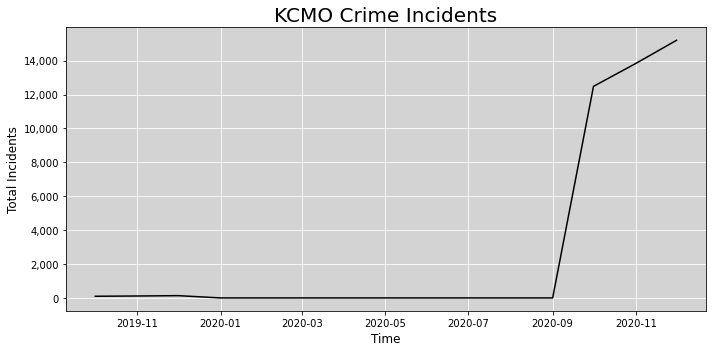

In [7]:
# generating timeseries plot from KCMO crime dataframe
plt.figure(figsize = (10, 5))
plt.plot(crime_data["Start Date"], crime_data["Total Incidents"], color = "black")
ax = plt.gca()
ax.set_facecolor('lightgray')
plt.title("KCMO Crime Incidents", fontsize = 20)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Total Incidents", fontsize = 12)

# thousands comma separator for y-axis
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.grid(True, color = "white")
plt.savefig("Images/kc_crime.png")
plt.show()

In [8]:
# creating dataframes for month's with incident type data in KCMO
october19 = parentIncidentType[0][0].reset_index()
october19 = october19.rename(columns = {'index': 'Crime Type', 'parentIncidentType': 'Incidents'})

november19 = parentIncidentType[1][0].reset_index()
november19 = november19.rename(columns = {'index': 'Crime Type', 'parentIncidentType': 'Incidents'})

december19 = parentIncidentType[2][0].reset_index()
december19 = december19.rename(columns = {'index': 'Crime Type', 'parentIncidentType': 'Incidents'})

october20 = parentIncidentType[3][0].reset_index()
october20 = october20.rename(columns = {'index': 'Crime Type', 'parentIncidentType': 'Incidents'})

november20 = parentIncidentType[4][0].reset_index()
november20 = november20.rename(columns = {'index': 'Crime Type', 'parentIncidentType': 'Incidents'})

december20 = parentIncidentType[5][0].reset_index()
december20 = december20.rename(columns = {'index': 'Crime Type', 'parentIncidentType': 'Incidents'})

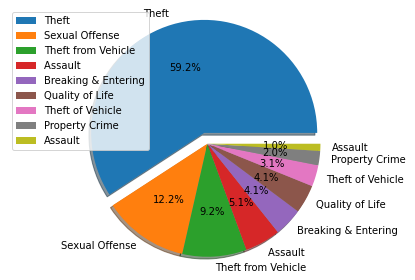

In [53]:
# generating pie charts for incident types for each month
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0)
october19.plot(kind = "pie", y = "Incidents", autopct = "%1.1f%%", explode = explode, shadow = True, labels = october19["Crime Type"], legend = True)
plt.legend (loc="upper left")
plt.axis("equal")
plt.ylabel("")
plt.tight_layout()
plt.savefig("Images/october19.png")
plt.show()

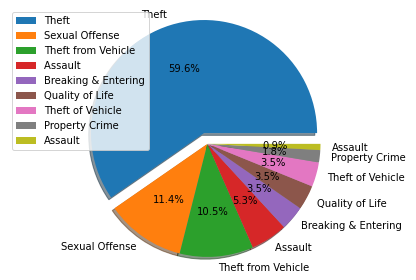

In [55]:
november19.plot(kind = "pie", y = "Incidents", autopct = "%1.1f%%", explode = explode, shadow = True, labels = november19["Crime Type"], legend = True)
plt.legend (loc="upper left")
plt.axis("equal")
plt.ylabel("")
plt.tight_layout()
plt.savefig("Images/november19.png")
plt.show()

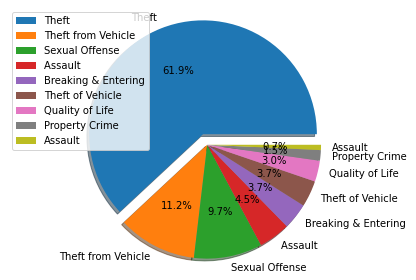

In [56]:
december19.plot(kind = "pie", y = "Incidents", autopct = "%1.1f%%", explode = explode, shadow = True, labels = december19["Crime Type"], legend = True)
plt.axis("equal")
plt.ylabel("")
plt.tight_layout()
plt.savefig("Images/december19.png")
plt.show()

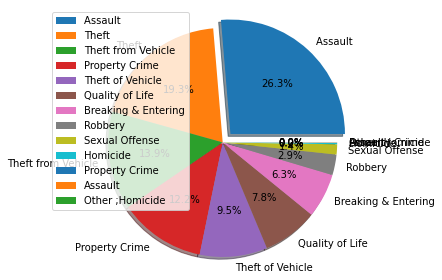

In [60]:
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
october20.plot(kind = "pie", y = "Incidents", autopct = "%1.1f%%", explode = explode, shadow = True, labels = october20["Crime Type"], legend = True)
plt.axis("equal")
plt.ylabel("")
plt.tight_layout()
plt.savefig("Images/october20.png")
plt.show()

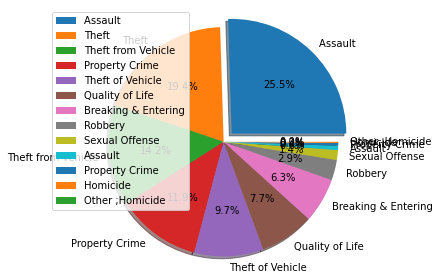

In [61]:
november20.plot(kind = "pie", y = "Incidents", autopct = "%1.1f%%", explode = explode, shadow = True, labels = november20["Crime Type"], legend = True)
plt.axis("equal")
plt.ylabel("")
plt.tight_layout()
plt.savefig("Images/november20.png")
plt.show()

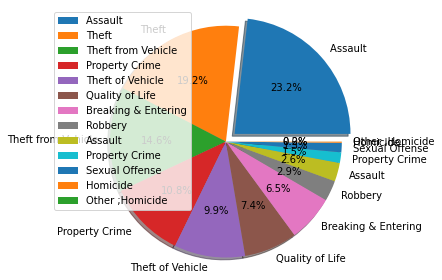

In [62]:
december20.plot(kind = "pie", y = "Incidents", autopct = "%1.1f%%", explode = explode, shadow = True, labels = december20["Crime Type"], legend = True)
plt.axis("equal")
plt.ylabel("")
plt.tight_layout()
plt.savefig("Images/december20.png")
plt.show()